In [45]:
#importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
dtypes = {'id':'str', 'author':'str', 'score':'int', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comment':'object', 'comment_sentiment_dict':'object',
       'agg_pos_comment_sentiment':'object', 'agg_compound_comment_sentiment':'object',
       'agg_neg_comment_sentiment':'object', 'comment_sentiment_class':'object',
       'aggregated_comment_class_sentiment':'float'}
cornell_centrality = pd.read_csv("/content/cornell_centrality_comment_new.csv")
c_dtypes = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
cornell_agg = pd.read_csv("/content/cornell_comment_sentiment_class.csv")

In [47]:
cornell_comment_agg = pd.read_csv('/content/cornell_comment_sentiment_class.csv')

In [48]:
cornell_comment_agg['compound_sentiment'] = cornell_comment_agg['comment_sentiment_dict'].apply(lambda x: float(eval(x)['compound']))

In [49]:
cornell_comment_agg['positive_sentiment'] = cornell_comment_agg['comment_sentiment_dict'].apply(lambda x: float(eval(x)['pos']))

In [50]:
cornell_comment_agg['negative_sentiment'] = cornell_comment_agg['comment_sentiment_dict'].apply(lambda x: float(eval(x)['neg']))

In [51]:
cornell_comment_agg['comment'] = cornell_comment_agg['comment'].apply(lambda x: eval(x))

In [52]:
cornell_comment_agg['comment_author'] = cornell_comment_agg['comment'].apply(lambda x: x['author'])
cornell_comment_agg['comment_score'] = cornell_comment_agg['comment'].apply(lambda x: x['score'])

In [53]:
cornell_comment_agg.head(1)['comment'].apply(lambda x: print(x.keys()))

dict_keys(['author', 'body', 'score', 'created_utc'])


0    None
Name: comment, dtype: object

In [54]:
cornell_comment_agg.columns

Index(['Unnamed: 0', 'id', 'author', 'score', 'upvote_ratio', 'num_comments',
       'subreddit', 'selftext', 'comment', 'comment_sentiment_dict',
       'agg_pos_comment_sentiment', 'agg_compound_comment_sentiment',
       'agg_neg_comment_sentiment', 'comment_sentiment_class',
       'compound_sentiment', 'positive_sentiment', 'negative_sentiment',
       'comment_author', 'comment_score'],
      dtype='object')

In [55]:
merged_df = cornell_centrality.merge(cornell_comment_agg[['comment_author', 'comment_score', 'positive_sentiment']], left_on='author', right_on='comment_author', how='left')

In [56]:
merged_df = merged_df.dropna()

In [64]:
# X1 = cornell_agg['num_comments'].values
X2 = merged_df['comment_score'].values
X3 = merged_df['btw_centrality'].values
X4 = merged_df['deg_centrality'].values
X6 = merged_df['clustering_coeff'].values
y = merged_df['positive_sentiment'].values
preds = np.column_stack((X2,X3, X6))
labels = ["comment_score", "btw_centrality", "clustering_coeff"]
l = [X2, X3, X6]

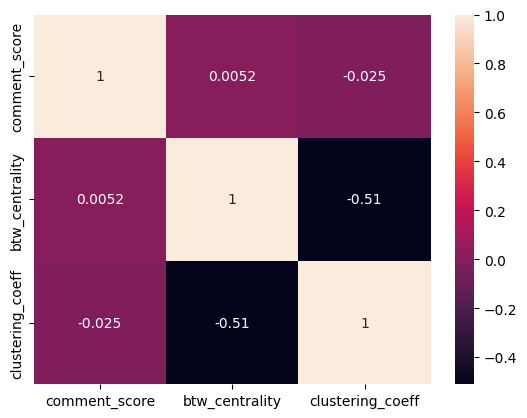

In [66]:
df = pd.DataFrame(preds, columns=labels)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [70]:
#regression with uncorrelated coefficients 
p = np.column_stack((X2, X3))
#regression model
model = sm.OLS(y, sm.add_constant(p))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.72e-08
Time:                        23:13:54   Log-Likelihood:                 546.15
No. Observations:                2926   AIC:                            -1086.
Df Residuals:                    2923   BIC:                            -1068.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1688      0.005     34.660      0.0

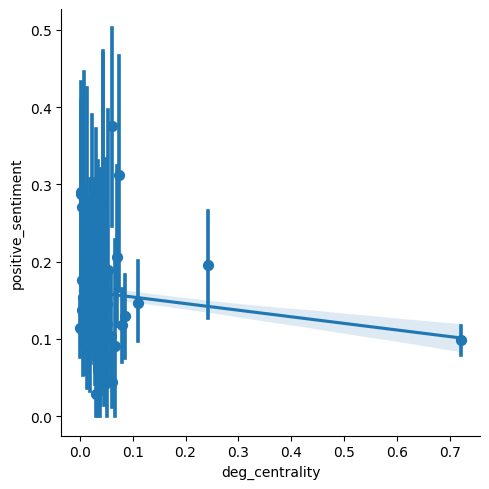

In [68]:
sns.lmplot(x="deg_centrality", y="positive_sentiment", data=merged_df, x_estimator=np.mean);